In [4]:
# stephanie's sandbox
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px


In [5]:
def clean_raw_data(clean_df, raw_data_file, skip):
    raw_data = pd.read_csv(raw_data_file, sep='\t', header=None, skiprows=skip, encoding='latin-1')
    data_col = raw_data[0]

    for row in range(0, len(data_col)):

        data_row = list(map(str, data_col[row].split())) # reformat to make string into list delimited by spaces
        
        add_row = {} # initialize, and clear dictionary for each row

        for i in range(0, len(data_row)):
            add_row = {'year': data_row[0], 
                    'month': data_row[1],
                    'timestamp': pd.Timestamp(year=int(data_row[0]), month=int(data_row[1]), day=1),
                    'monthly_anom': data_row[2],
                    'monthly_unc': data_row[3], 
                    'one_yr_anom': data_row[4], 
                    'one_yr_unc': data_row[5]}

        clean_df = clean_df._append(add_row, ignore_index=True) # append is being depricated, todo: use concat or merge

    # cast year and  month as  int - todo, make timestamp
    clean_df['year'] = clean_df['year'].astype(int)
    clean_df['month'] = clean_df['month'].astype(int)

    # cast weather data (columns 2-5) as floats
    clean_df['monthly_anom'] = clean_df['monthly_anom'].astype(float)
    clean_df['monthly_unc'] = clean_df['monthly_unc'].astype(float)
    clean_df['one_yr_anom'] = clean_df['one_yr_anom'].astype(float)
    clean_df['one_yr_unc'] = clean_df['one_yr_unc'].astype(float)

    # filter data to years after 1920
    clean_df = clean_df[clean_df['year'] >= 1920]

    # add timestamp column
  
    return clean_df

In [6]:
def get_season_df(df, season):
    summer_months = [1, 2, 12]
    autumn_months = [3, 4, 5]
    winter_months = [6, 7, 8]
    spring_months = [9, 10,11]

    if season == 'summer':
        season_df = df[df['month'].isin(summer_months)]
    elif season == 'autumn':
        season_df = df[df['month'].isin(autumn_months)]
    elif season == 'winter':
        season_df = df[df['month'].isin(winter_months)]
    elif season == 'spring':
        season_df = df[df['month'].isin(spring_months)]
    else: 
        print('Invalid season')
        return df

    return season_df

In [7]:
# files and constants
south_america_file = 'SouthAmerica_raw.txt'
lima_file = 'Lima_Peru_raw.txt'
santiago_file = 'Santiago_Chile_raw.txt'
saopaulo_file = 'SaoPaulo_Brazil_raw.txt'

weather_cols = ['year', 'month', 'monthly_anom', 'monthly_unc', 'one_yr_anom', 'one_yr_unc']


In [8]:
# clean data
south_data = pd.DataFrame(columns=weather_cols)
south_data = clean_raw_data(south_data, south_america_file, 71)

lima_data = pd.DataFrame(columns=weather_cols)
lima_data = clean_raw_data(lima_data, lima_file, 71)

santiago_data = pd.DataFrame(columns=weather_cols)
santiago_data = clean_raw_data(santiago_data, santiago_file, 69)

saopaulo_data = pd.DataFrame(columns=weather_cols)
saopaulo_data = clean_raw_data(saopaulo_data, saopaulo_file, 69)

In [9]:
lima_data.describe()

,year,month,monthly_anom,monthly_unc,one_yr_anom,one_yr_unc
count,1212.000000,1212.000000,1212.000000,1212.000000,1206.000000,1206.000000
mean,1970.000000,6.500000,0.114011,0.339507,0.107731,0.178206
std,29.166794,3.453478,0.544916,0.171055,0.444255,0.097318
min,1920.000000,1.000000,-1.420000,0.078000,-0.861000,0.038000
25%,1945.000000,3.750000,-0.271000,0.235000,-0.205000,0.119000
50%,1970.000000,6.500000,0.068000,0.300000,0.059000,0.152500
75%,1995.000000,9.250000,0.435000,0.392000,0.418750,0.194750
max,2020.000000,12.000000,2.072000,1.852000,1.508000,0.656000


In [10]:
# get season data

# summer
south_america_summer = get_season_df(south_data, 'summer')
lima_summer = get_season_df(lima_data, 'summer')
santiago_summer = get_season_df(santiago_data, 'summer')
saopaulo_summer = get_season_df(saopaulo_data, 'summer')

# autumn
south_america_autumn = get_season_df(south_data, 'autumn')
lima_autumn = get_season_df(lima_data, 'autumn')
santiago_autumn = get_season_df(santiago_data, 'autumn')
saopaulo_autumn = get_season_df(saopaulo_data, 'autumn')

# winter
south_america_winter = get_season_df(south_data, 'winter')
lima_winter = get_season_df(lima_data, 'winter')
santiago_winter = get_season_df(santiago_data, 'winter')
saopaulo_winter = get_season_df(saopaulo_data, 'winter')

# spring
south_america_spring = get_season_df(south_data, 'spring')
lima_spring = get_season_df(lima_data, 'spring')
santiago_spring = get_season_df(santiago_data, 'spring')
saopaulo_spring = get_season_df(saopaulo_data, 'spring')

In [11]:
# Sample data
data = {
    'city': ['Sao Paulo', 'Lima', 'Santiago'],
    'lat': [-23.31, -12.0464, -33.4489],
    'lon': [-46.31, -77.0428, -70.6693],
    'population': [2890000, 9674755, 5743719]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    df, 
    lat="lat", 
    lon="lon", 
    hover_name="city", 
    hover_data=["population"],
    color_discrete_sequence=["fuchsia"], 
    zoom=3, 
    height=500
)

# Set the mapbox access token
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the plot
fig.show()

In [12]:
# example map plot with plotly express and choropleth
data = {
    'country': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'],
    'values': [100, 100, 20, 25, 100, 100, 100, 100, 50, 100, 100, 100]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a choropleth map
fig = px.choropleth(
    df, 
    locations='country', 
    locationmode='country names',
    color='values',
    hover_name='country', 
    color_continuous_scale=px.colors.sequential.Plasma,
    projection='mercator',
    title='Sample Data of South America'
)

# Update layout for better visualization
fig.update_geos(fitbounds="locations", visible=False)

# Show the map
fig.show()

In [13]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=south_america_summer['timestamp'], y=south_america_summer['one_yr_anom'], name='South America - summer') )
fig.add_trace(go.Scatter(x=south_america_autumn['timestamp'], y=south_america_autumn['one_yr_anom'], name='South America - autumn') )
fig.add_trace(go.Scatter(x=south_america_winter['timestamp'], y=south_america_winter['one_yr_anom'], name='South America - winter') )
fig.add_trace(go.Scatter(x=south_america_spring['timestamp'], y=south_america_spring['one_yr_anom'], name='South America - spring') )

fig.add_trace(go.Scatter(x=lima_summer['timestamp'], y=lima_summer['one_yr_anom'], name='Lima - summer') )
fig.add_trace(go.Scatter(x=lima_autumn['timestamp'], y=lima_autumn['one_yr_anom'], name='Lima - autumn') )
fig.add_trace(go.Scatter(x=lima_winter['timestamp'], y=lima_winter['one_yr_anom'], name='Lima - winter') )
fig.add_trace(go.Scatter(x=lima_spring['timestamp'], y=lima_spring['one_yr_anom'], name='Lima - spring') )

fig.add_trace(go.Scatter(x=santiago_summer['timestamp'], y=santiago_summer['one_yr_anom'], name='Santiago - summer') )
fig.add_trace(go.Scatter(x=santiago_autumn['timestamp'], y=santiago_autumn['one_yr_anom'], name='Santiago - autumn') )
fig.add_trace(go.Scatter(x=santiago_winter['timestamp'], y=santiago_winter['one_yr_anom'], name='Santiago - winter') )
fig.add_trace(go.Scatter(x=santiago_spring['timestamp'], y=santiago_spring['one_yr_anom'], name='Santiago - spring') )

fig.add_trace(go.Scatter(x=saopaulo_summer['timestamp'], y=saopaulo_summer['one_yr_anom'], name='Sao Paulo - summer') )
fig.add_trace(go.Scatter(x=saopaulo_autumn['timestamp'], y=saopaulo_autumn['one_yr_anom'], name='Sao Paulo - autumn') )
fig.add_trace(go.Scatter(x=saopaulo_winter['timestamp'], y=saopaulo_winter['one_yr_anom'], name='Sao Paulo - winter') )
fig.add_trace(go.Scatter(x=saopaulo_spring['timestamp'], y=saopaulo_spring['one_yr_anom'], name='Sao Paulo - spring') )

fig.update_layout(title='South America Data',
                  xaxis_title='Year',
                  yaxis_title='One year anomaly',
                  legend_title='Legend')

fig.show()

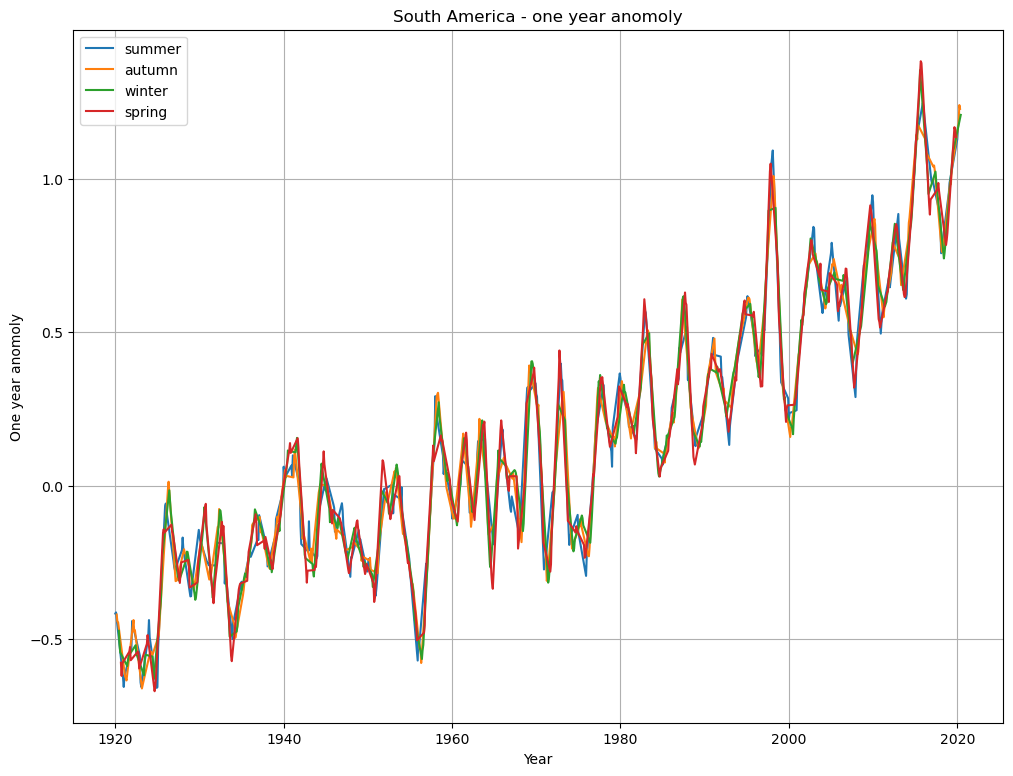

In [14]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_summer['timestamp'], south_america_summer['one_yr_anom'])
plt.plot(south_america_autumn['timestamp'], south_america_autumn['one_yr_anom'])
plt.plot(south_america_winter['timestamp'], south_america_winter['one_yr_anom'])
plt.plot(south_america_spring['timestamp'], south_america_spring['one_yr_anom'])

plt.title('South America - one year anomoly')
plt.xlabel('Year')
plt.ylabel('One year anomoly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()


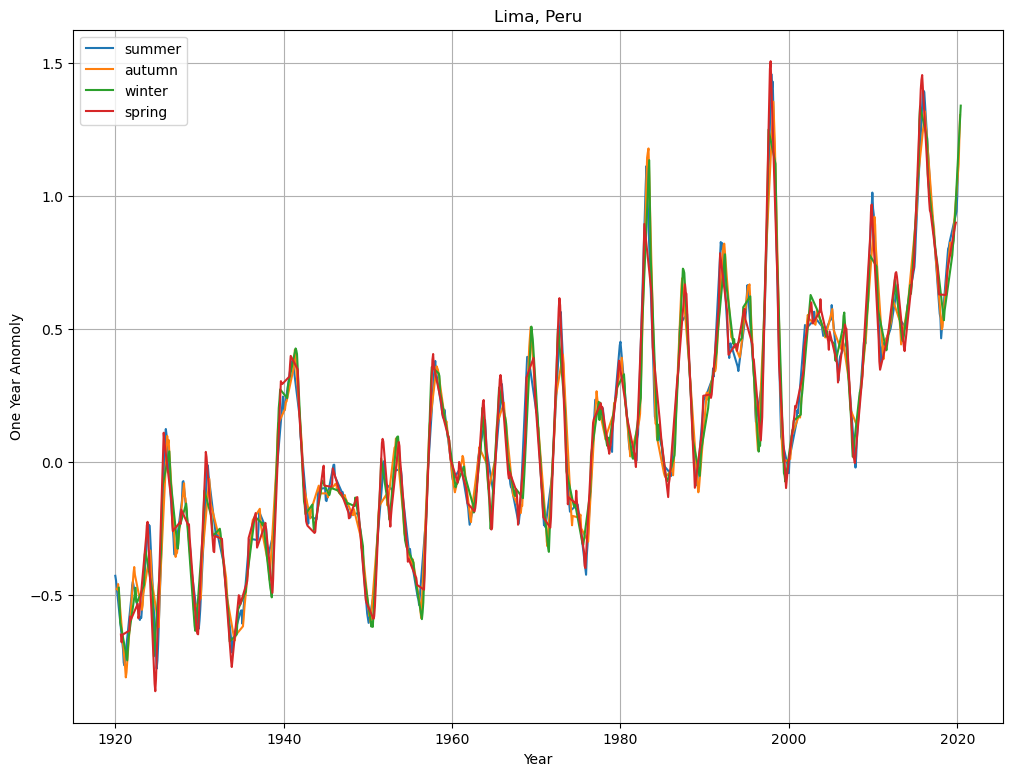

In [15]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(lima_summer['timestamp'], lima_summer['one_yr_anom'])
plt.plot(lima_autumn['timestamp'], lima_autumn['one_yr_anom'])
plt.plot(lima_winter['timestamp'], lima_winter['one_yr_anom'])
plt.plot(lima_spring['timestamp'], lima_spring['one_yr_anom'])

plt.title('Lima, Peru')
plt.xlabel('Year')
plt.ylabel('One Year Anomoly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()

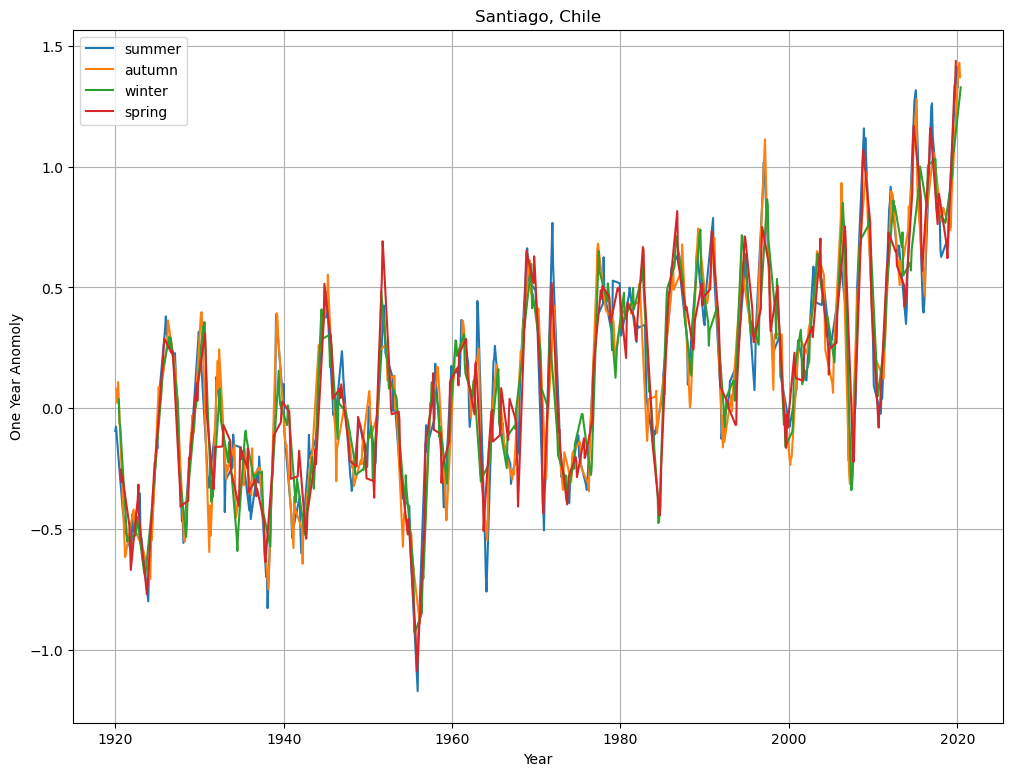

In [16]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(santiago_summer['timestamp'], santiago_summer['one_yr_anom'])
plt.plot(santiago_autumn['timestamp'], santiago_autumn['one_yr_anom'])
plt.plot(santiago_winter['timestamp'], santiago_winter['one_yr_anom'])
plt.plot(santiago_spring['timestamp'], santiago_spring['one_yr_anom'])

plt.title('Santiago, Chile')
plt.xlabel('Year')
plt.ylabel('One Year Anomoly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()

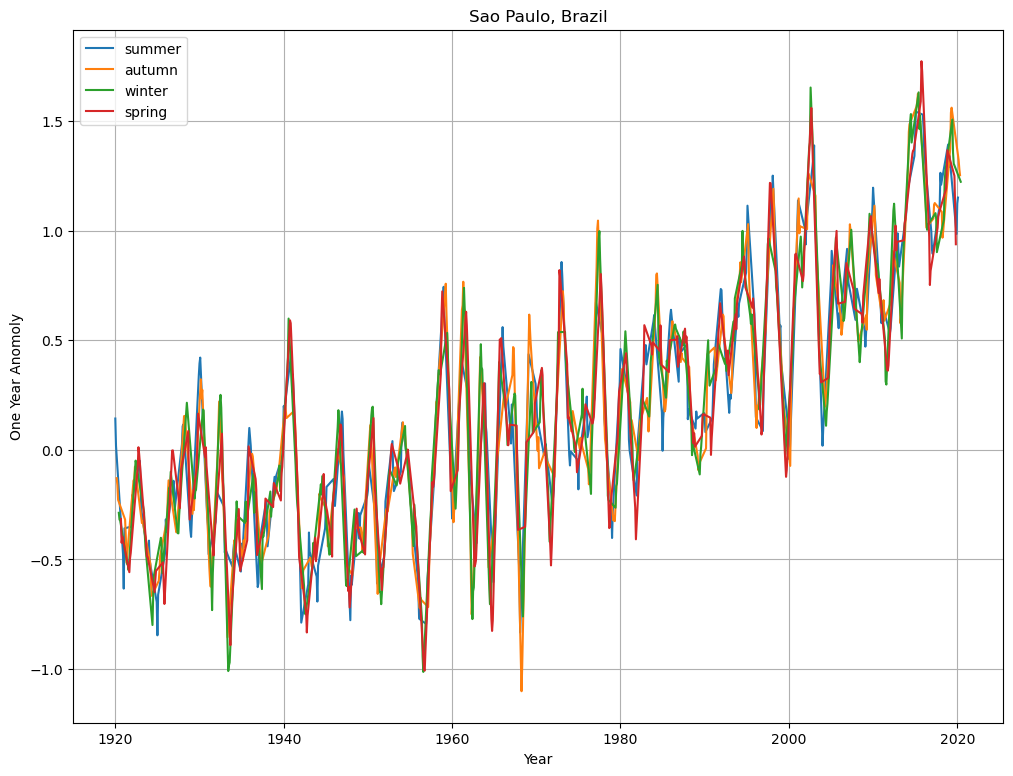

In [17]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(saopaulo_summer['timestamp'], saopaulo_summer['one_yr_anom'])
plt.plot(saopaulo_autumn['timestamp'], saopaulo_autumn['one_yr_anom'])
plt.plot(saopaulo_winter['timestamp'], saopaulo_winter['one_yr_anom'])
plt.plot(saopaulo_spring['timestamp'], saopaulo_spring['one_yr_anom'])

plt.title('Sao Paulo, Brazil')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['summer', 'autumn', 'winter', 'spring'])
plt.grid()

plt.show()

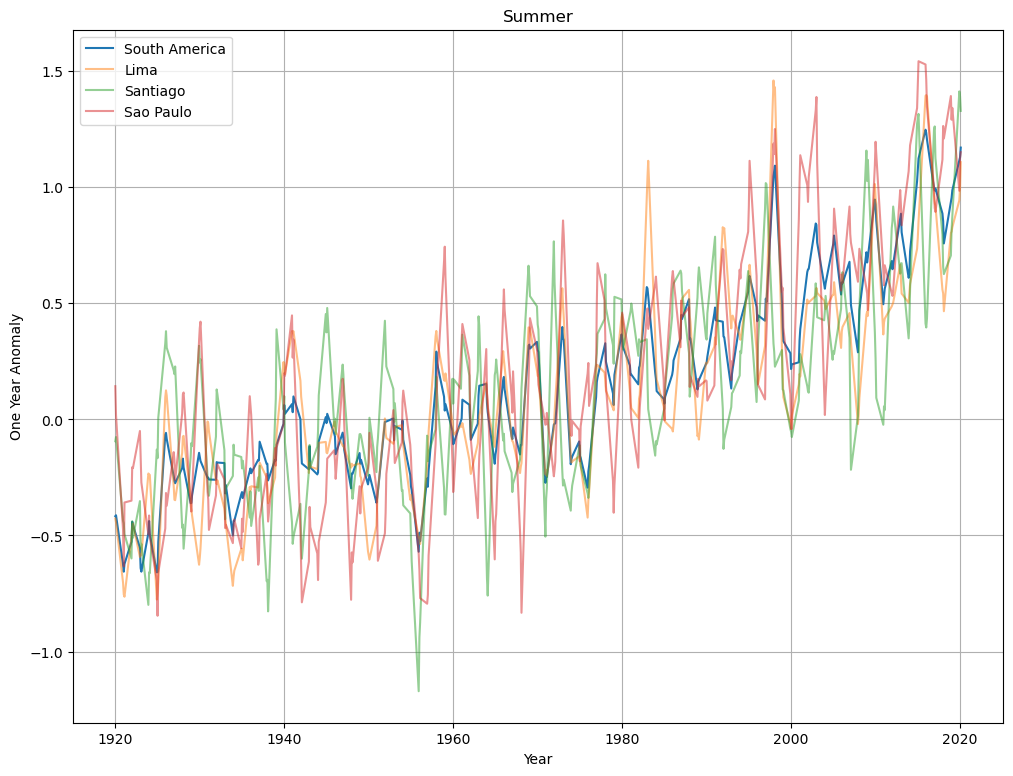

In [18]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_summer['timestamp'], south_america_summer['one_yr_anom'])
plt.plot(lima_summer['timestamp'], lima_summer['one_yr_anom'], alpha=0.5)
plt.plot(santiago_summer['timestamp'], santiago_summer['one_yr_anom'], alpha=0.5)
plt.plot(saopaulo_summer['timestamp'], saopaulo_summer['one_yr_anom'], alpha=0.5)

plt.title('Summer')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['South America', 'Lima', 'Santiago', 'Sao Paulo'])
plt.grid()

plt.show()

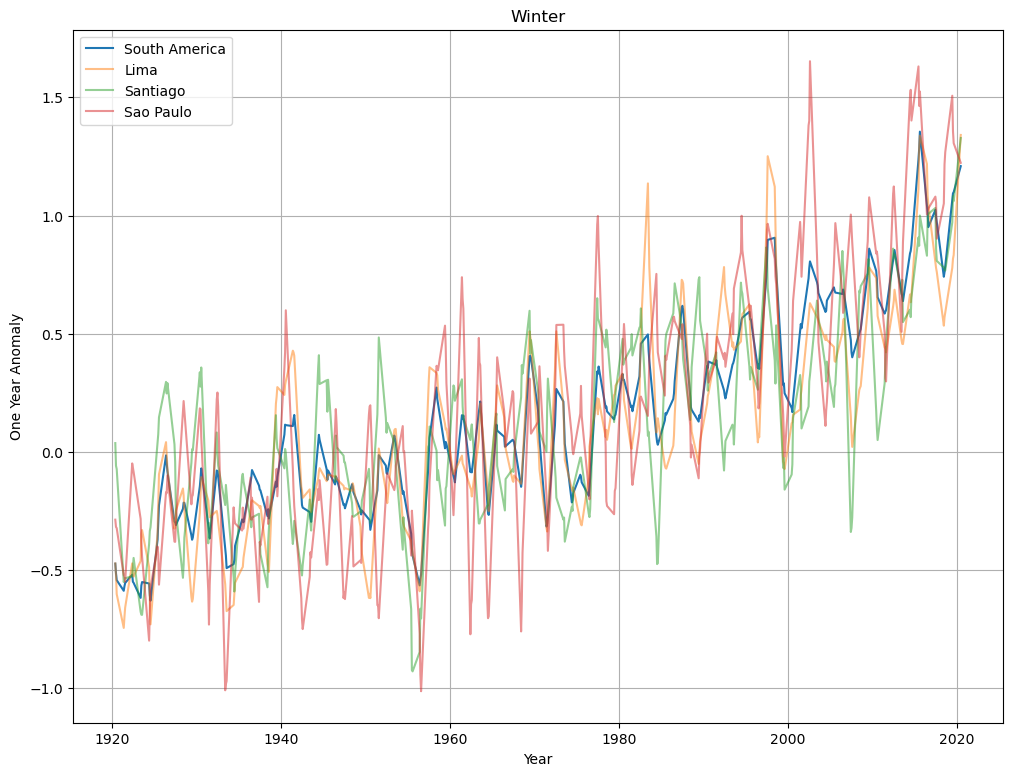

In [19]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_winter['timestamp'], south_america_winter['one_yr_anom'])
plt.plot(lima_winter['timestamp'], lima_winter['one_yr_anom'], alpha=0.5)
plt.plot(santiago_winter['timestamp'], santiago_winter['one_yr_anom'], alpha=0.5)
plt.plot(saopaulo_winter['timestamp'], saopaulo_winter['one_yr_anom'], alpha=0.5)

plt.title('Winter')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['South America', 'Lima', 'Santiago', 'Sao Paulo'])
plt.grid()

plt.show()

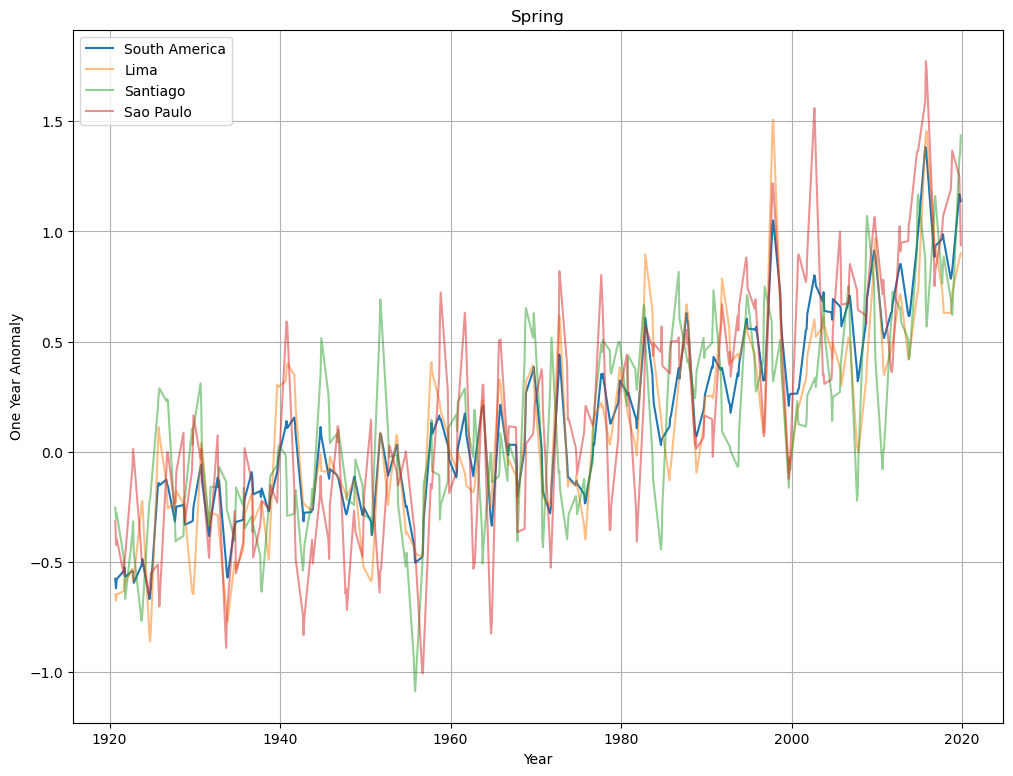

In [20]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_spring['timestamp'], south_america_spring['one_yr_anom'])
plt.plot(lima_spring['timestamp'], lima_spring['one_yr_anom'], alpha=0.5)
plt.plot(santiago_spring['timestamp'], santiago_spring['one_yr_anom'], alpha=0.5)
plt.plot(saopaulo_spring['timestamp'], saopaulo_spring['one_yr_anom'], alpha=0.5)

plt.title('Spring')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['South America', 'Lima', 'Santiago', 'Sao Paulo'])
plt.grid()

plt.show()

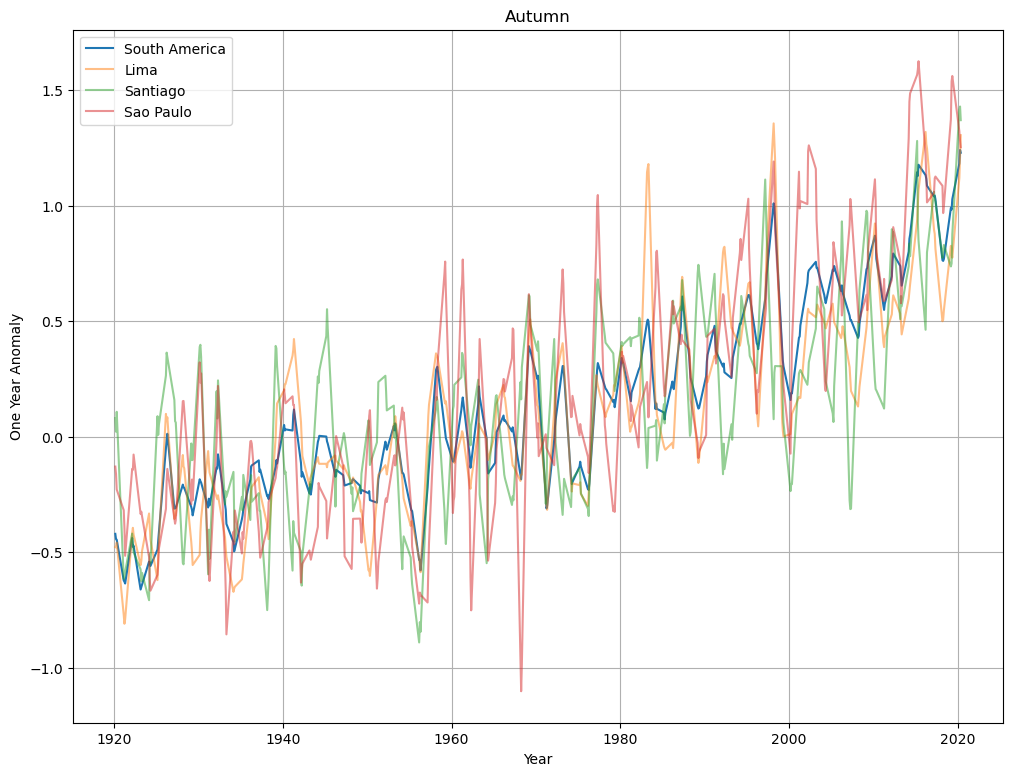

In [21]:
fig, ax = plt.subplots(figsize=(12,9))

plt.plot(south_america_autumn['timestamp'], south_america_autumn['one_yr_anom'])
plt.plot(lima_autumn['timestamp'], lima_autumn['one_yr_anom'], alpha=0.5)
plt.plot(santiago_autumn['timestamp'], santiago_autumn['one_yr_anom'], alpha=0.5)
plt.plot(saopaulo_autumn['timestamp'], saopaulo_autumn['one_yr_anom'], alpha=0.5)

plt.title('Autumn')
plt.xlabel('Year')
plt.ylabel('One Year Anomaly')
plt.legend(['South America', 'Lima', 'Santiago', 'Sao Paulo'])
plt.grid()

plt.show()

### Testing Cells Below

In [22]:
df_south_america_import = pd.read_csv(south_america_file, sep='\t', header=None, skiprows=71)
# df_south_america_import
sa_col= df_south_america_import[0]
sa_col[0]


'  1856     1    -0.121  0.826       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN'

In [3]:
# make data frame
weather_cols = ['year', 'month', 'monthly_anom', 'monthly_unc', 'one_yr_anom', 'one_yr_unc', 'five_yr_anom', 'five_yr_unc', 'ten_yr_anom', 'ten_yr_unc', 'twenty_yr_anom', 'twenty_yr_unc']
df_sa = pd.DataFrame(columns=weather_cols)

for row in range(0, len(sa_col)):
    test = list(map(str, sa_col[row].split()))

    add_row = {}

    for i in range(0,len(test)):
        add_row = {'year': test[0], 
                'month': test[1],
                'monthly_anom': test[2],
                'monthly_unc': test[3], 
                'one_yr_anom': test[4], 
                'one_yr_unc': test[5], 
                'five_yr_anom': test[6], 
                'five_yr_unc': test[7], 
                'ten_yr_anom': test[8], 
                'ten_yr_unc': test[9], 
                'twenty_yr_anom': test[10], 
                'twenty_yr_unc': test[11]}
        
    df_sa = df_sa._append(add_row, ignore_index=True)
    
display(df_sa)


NameError: name 'pd' is not defined